1. tsv파일 로드
2. order_id 컬럼은 숫자의 의미를 가지지 않기 때문에 문자형 데이터를 변환
3. 가장 많이 주문한 item_name과 그 수량을 출력
4. item당 주문 총량 구하고 바형 그래프 출력
5. item_price 컬럼은 $금액 -> 금액 변경을 하면서 float의 형태로 변환 
6. 주문당 평균 계산 금액 출력
7. 각 item의 가격을 출력한 후에 가격 분포 그래프  / 가격 히스토그램 출력
8. "chicken Bowl" 을 2개 이상 주문한 고객들의 "chicken Bowl" 메뉴의 총 주문 수량 출력

In [167]:
import pandas as pd

In [168]:
## tsv 파일 로드
chipo = pd.read_csv("../csv/num_1/chipotle.tsv",sep ="\t")

In [169]:
chipo_copy = chipo
chipo_copy.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [170]:
## order_id 컬럼은 숫자의 의막 없기 때문에 문자열로 데이터형태 변환
## astype() 함수를 이용하여 데이터의 형태를 변환
chipo_copy["order_id"] = chipo_copy["order_id"].astype(str)

In [171]:
##가장 많이 주문한 item_name과 그 수량을 출력
## 그룹화 -> sum() -> quantity -> sort_values(ascending=False)
## top_10을 출력
chipo_copy.groupby("item_name").sum()["quantity"].sort_values(ascending=False).head(10)


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [172]:
## 주문 횟수가 가장 많은 메뉴는?
chipo_copy['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [173]:
chipo_copy.groupby("item_name").count().sort_values("order_id",ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,726,726,726,726
Chicken Burrito,553,553,553,553
Chips and Guacamole,479,479,0,479
Steak Burrito,368,368,368,368
Canned Soft Drink,301,301,301,301
Steak Bowl,211,211,211,211
Chips,211,211,0,211
Bottled Water,162,162,0,162
Chicken Soft Tacos,115,115,115,115


In [174]:
## 주문 총량 시각화
import matplotlib.pyplot as plt

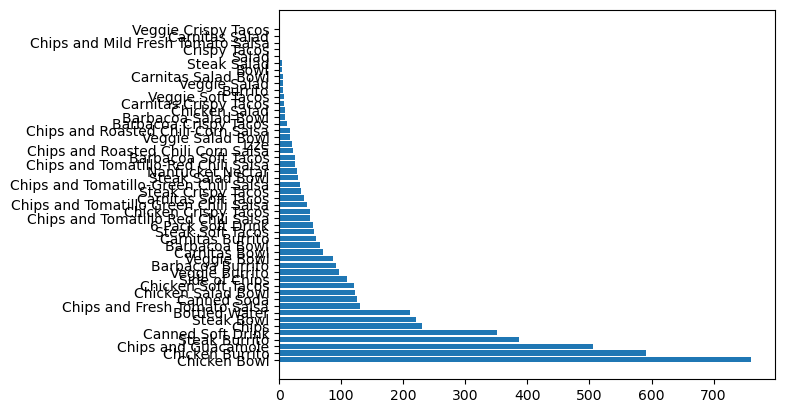

In [175]:
## 주문총량 바형 그래프로 
group_data = chipo_copy.groupby("item_name").sum()["quantity"].sort_values(ascending=False)

## x축과 y축의 값을 어떠한 값을 넣어야 할지 지정
x = group_data.index
y = group_data.values

## 시각화
plt.barh(x,y)  ## h 를 쓰면 90도 회전된 그래프가 나옴
plt.show()

In [176]:
## item_price 컬럼의 데이터에서 $를 삭제하고 데이터의 형태를 float변경

## $를삭제
# 일반적인 replace() 함수를 이용해서 삭제
chipo_copy['item_price'].str.replace("$","").astype('float')

# apply()와 replace()를 이용한 삭제
def change(x):
    result = x.replace("$","")                 ## str은 판다스에서 스리즈에서 사용 여기선 데이터 프레임
    return result                               ## result 는 지역 변수 
chipo_copy['item_price'].apply(change).astype('float')    
    
# apply(), lambda(),replace()를 이용한삭제
chipo_copy['item_price'].apply(lambda x : x.replace("$",""))

# strip()
chipo_copy['item_price'] = chipo_copy['item_price'].str.lstrip("$").astype('float')



C:\Users\msi\AppData\Local\Temp\ipykernel_20184\2739975062.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo_copy['item_price'].str.replace("$","").astype('float')


In [177]:
## 주문당 평균 금액
## order_id를 기준으로 그룹화 --> sum()['item_price'].mean()
chipo_copy.groupby('order_id').sum()['item_price'].mean()

18.811428571428717

In [178]:
## 각 아이템의 가격을 출력한 후에 가격 분포그래프 /가격 히스토그램 출력

## 각 item_name을 그룹화 하여 합계를 구한다
group_data_2 =chipo_copy.groupby("item_name").sum()

## price라는 새로운 파생변수생성
## itme_price / quantity
menu_price = group_data_2['item_price'] / group_data_2['quantity']

In [179]:
## 가장 비싼 메뉴와 가장 싼 메뉴

##가장 비싼 메뉴
menu_price.sort_values(ascending=False).head(1)
## 가장 싼 메뉴
menu_price.sort_values().head(1)

item_name
Canned Soda    1.09
dtype: float64

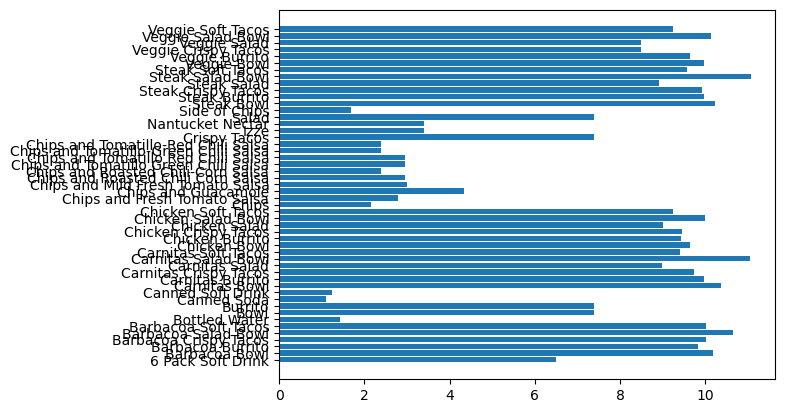

In [182]:
## 아이템당 가격분포 그래프 바형 그래프 출력
x = menu_price.index
y = menu_price.values
plt.barh(x,y)
plt.show()

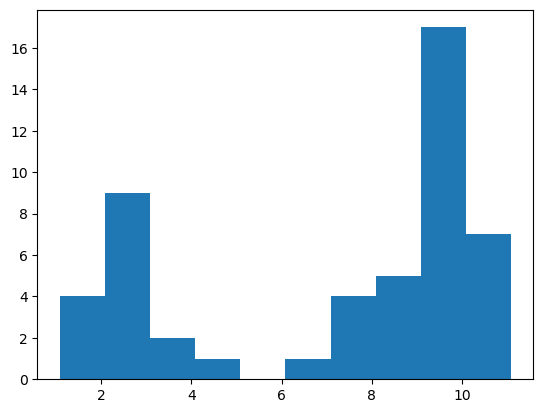

In [184]:
## 히스토그램
plt.hist(y)
plt.show()

In [205]:
## chicken bowl 2개 이상 주문한 고객들이 주문한 chichen bowl 총 주문 수량
chipo_copy.loc[(chipo_copy["item_name"]=="Chicken Bowl") & (chipo_copy["quantity"] >= 2)].sum()["quantity"]


# chipo_copy[(chipo_copy["item_name"]=="Chicken Bowl") & (chipo_copy["quantity"] >= 2)]

68

In [188]:
chipo_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB
